# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_tmp=[]
wind_speed=[]

In [6]:
print("Beginning Data Retrieval")
print("-----------------------------------------")

counter = 0
for city in cities:
    try:
        counter = counter + 1
        print(f"Processing Record {counter} of Set 1 | {city}")
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        attribute = "q=" + city
        api_key = "&appid="+ weather_api_key
        url = base_url + attribute + api_key
        data = requests.get(url)
        data = requests.get(url).json()
        city_name.append(data['name'])
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_tmp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
    except (KeyError):
        print("Whoops. City not found! But I will keep processing!")
    except (IndexError):
        print("Whoops. City not found! But I will keep processing!")
print(f"All done! I managed to get data on {counter} cities")

Beginning Data Retrieval
-----------------------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | taree
Processing Record 6 of Set 1 | puerto leguizamo
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | hashtrud
Processing Record 9 of Set 1 | half moon bay
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | chatra
Processing Record 15 of Set 1 | porto santo
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | cayenne
Processing Record 18 of Set 1 | san cristobal
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | kurchum
Processing Record 22 of Set 1 | nola
Processing Record 23 of Se

Processing Record 178 of Set 1 | shafter
Processing Record 179 of Set 1 | rio gallegos
Processing Record 180 of Set 1 | leningradskiy
Processing Record 181 of Set 1 | camacha
Processing Record 182 of Set 1 | grand river south east
Whoops. City not found! But I will keep processing!
Processing Record 183 of Set 1 | general roca
Processing Record 184 of Set 1 | fort saint john
Whoops. City not found! But I will keep processing!
Processing Record 185 of Set 1 | qafsah
Whoops. City not found! But I will keep processing!
Processing Record 186 of Set 1 | attawapiskat
Whoops. City not found! But I will keep processing!
Processing Record 187 of Set 1 | grottammare
Processing Record 188 of Set 1 | faya
Processing Record 189 of Set 1 | barrow
Processing Record 190 of Set 1 | lata
Processing Record 191 of Set 1 | char bhadrasan
Processing Record 192 of Set 1 | petrykivka
Processing Record 193 of Set 1 | chapais
Processing Record 194 of Set 1 | yabucoa
Processing Record 195 of Set 1 | sao joao da 

Processing Record 351 of Set 1 | pakwach
Whoops. City not found! But I will keep processing!
Processing Record 352 of Set 1 | faanui
Processing Record 353 of Set 1 | carauari
Processing Record 354 of Set 1 | cascais
Processing Record 355 of Set 1 | karratha
Processing Record 356 of Set 1 | ndola
Processing Record 357 of Set 1 | fengrun
Processing Record 358 of Set 1 | auki
Processing Record 359 of Set 1 | novikovo
Processing Record 360 of Set 1 | ugoofaaru
Processing Record 361 of Set 1 | eureka
Processing Record 362 of Set 1 | aklavik
Processing Record 363 of Set 1 | binga
Processing Record 364 of Set 1 | maragogi
Processing Record 365 of Set 1 | sechura
Processing Record 366 of Set 1 | kijang
Processing Record 367 of Set 1 | gamba
Processing Record 368 of Set 1 | imbituba
Processing Record 369 of Set 1 | xining
Processing Record 370 of Set 1 | mumford
Processing Record 371 of Set 1 | yura
Processing Record 372 of Set 1 | barkhan
Processing Record 373 of Set 1 | penzance
Processing Re

Processing Record 529 of Set 1 | dongsheng
Processing Record 530 of Set 1 | avera
Processing Record 531 of Set 1 | eregli
Processing Record 532 of Set 1 | bauchi
Processing Record 533 of Set 1 | rodrigues alves
Processing Record 534 of Set 1 | omsukchan
Processing Record 535 of Set 1 | kashi
Processing Record 536 of Set 1 | makakilo city
Processing Record 537 of Set 1 | aldan
Processing Record 538 of Set 1 | laje
Processing Record 539 of Set 1 | itapuranga
Processing Record 540 of Set 1 | okahandja
Processing Record 541 of Set 1 | yaritagua
Processing Record 542 of Set 1 | chokurdakh
Processing Record 543 of Set 1 | chiredzi
Processing Record 544 of Set 1 | sobolevo
Processing Record 545 of Set 1 | harper
Processing Record 546 of Set 1 | kaitangata
Processing Record 547 of Set 1 | quelimane
Processing Record 548 of Set 1 | vallenar
Processing Record 549 of Set 1 | kirksville
Processing Record 550 of Set 1 | ternate
Processing Record 551 of Set 1 | robertsport
Processing Record 552 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_d = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_tmp,
    "Wind Speed" : wind_speed
}
city_data = pd.DataFrame(city_d)
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,27,CL,1585400470,75,-53.15,-70.92,278.15,6.20
1,Albany,75,US,1585400342,69,42.60,-73.97,276.48,0.36
2,Chui,99,UY,1585400470,74,-33.70,-53.46,296.49,5.68
3,Tasiilaq,90,GL,1585400470,58,65.61,-37.64,270.15,1.50
4,Taree,75,AU,1585400470,100,-31.90,152.47,292.15,2.10


In [31]:
from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2020-03-29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

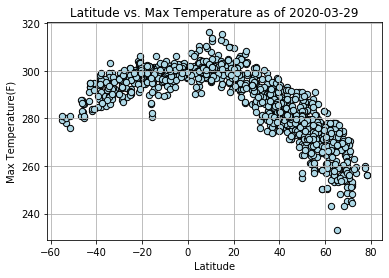

In [33]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], 
            color="lightblue",edgecolors = "k", s=40)
plt.title(f"Latitude vs. Max Temperature as of {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

#### Latitude vs. Humidity Plot

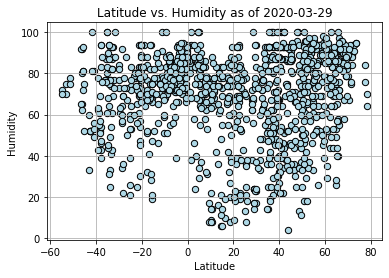

In [34]:
plt.scatter(city_data["Lat"], city_data["Humidity"], 
            color="lightblue",edgecolors = "k", s=40)
plt.title(f"Latitude vs. Humidity as of {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

#### Latitude vs. Cloudiness Plot

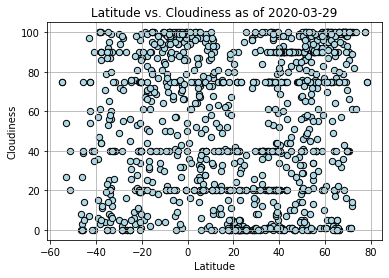

In [35]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], 
            color="lightblue",edgecolors = "k", s=40)
plt.title(f"Latitude vs. Cloudiness as of {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

#### Latitude vs. Wind Speed Plot

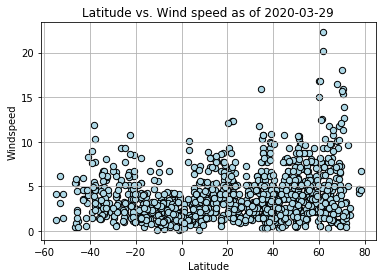

In [36]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], 
            color="lightblue",edgecolors = "k", s=40)
plt.title(f"Latitude vs. Wind speed as of {today}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


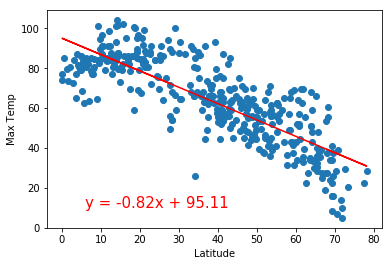

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


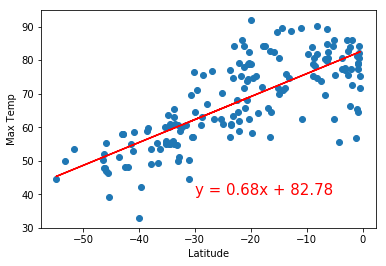

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


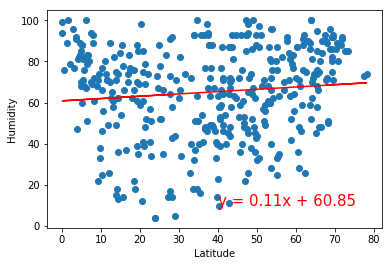

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


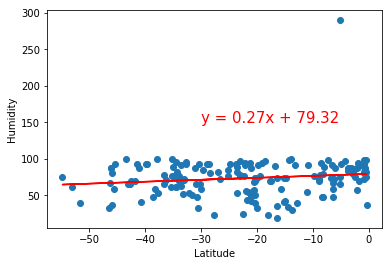

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


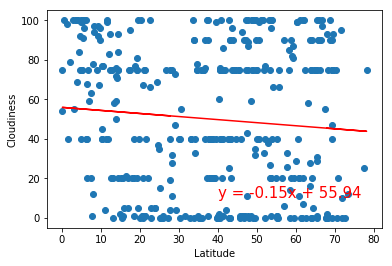

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


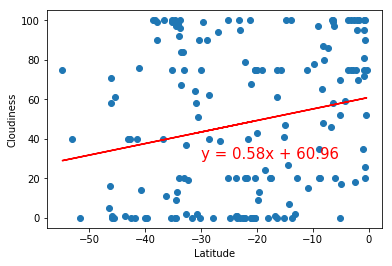

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


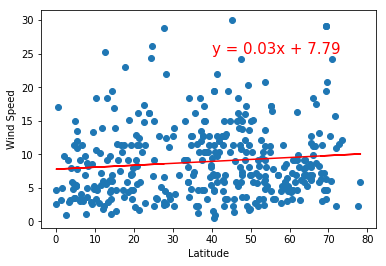

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


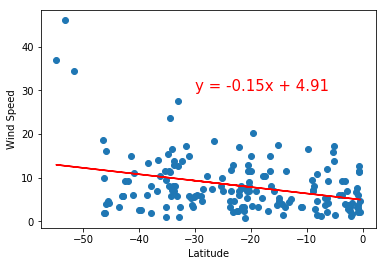

In [46]:
#for city in cities:
#print(f"Processing Record {counter} of Set 1 | {city}")
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
#attribute = "q=tarakan"
#api_key = "&appid="+ weather_api_key
#url = base_url + attribute + api_key
#data = requests.get(url)
#data = requests.get(url).json()
#city_name.append(data['name'])
#cloudiness.append(data['clouds']['all'])
#country.append(data['sys']['country'])
#date.append(data['dt'])
#humidity.append(data['main']['humidity'])
#lat.append(data['coord']['lat'])
#lng.append(data['coord']['lon'])
#max_tmp.append(data['main']['temp_max'])
#wind_speed.append(data['wind']['speed'])
#except (KeyError, IndexError):
#print("Whoops. City not found! But I will keep processing!")     
#print(f"All done! I managed to get data on {counter} cities")


Processing Record 622 of Set 1 | palampur


['ID', 'ID', 'ID']